<a href="https://colab.research.google.com/github/jasxn808/Basic-Python-Analysis-NFL-Stats/blob/main/DateTime%2C_Re_sampling%2C_and_Plotting_(Avg_Yds_Gained).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nfl_data_py

In [150]:
import pandas as pd
import nfl_data_py as nfl
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

df = nfl.import_pbp_data([2016])
sample = df.head()[['play_id', 'game_id', 'old_game_id']]
sample['str_date'] = sample['old_game_id'].str[:-2]

sample['date_conv'] =  pd.to_datetime(sample['str_date'], format = '%Y%m%d')

In [ ]:
df['date_str'] =\
  df['old_game_id'].str[:-2]

df['game_date'] = \
  pd.to_datetime(df['date_str'], format='%Y%m%d')

# df['game_date']

df_pass = df.query('play_type == "pass"').fillna(0)[['game_date','yards_gained', 'play_type', 'game_id']]
df_run = df.query('play_type == "run"').fillna(0)[['game_date', 'yards_gained','play_type', 'game_id']]


In [ ]:
df_wbw_pass = \
df_pass.set_index('game_date')

df_wbw_run = \
  df_run.set_index('game_date')



In [ ]:
df_wbw_pass_agg = \
  df_wbw_pass.resample('W')\
    .agg({'yards_gained':'mean'})


df_wbw_run_agg = \
  df_wbw_run.resample('W')\
  .agg({'yards_gained':'mean'})



In [200]:
df_pass_fig = \
  df_wbw_pass_agg.reset_index()

df_pass_fig['week'] = range(len(df_pass_fig))
df_pass_fig['week'] += 1


df_run_fig = \
  df_wbw_run_agg.reset_index()

df_run_fig['week'] = range(len(df_run_fig))
df_run_fig['week'] += 1

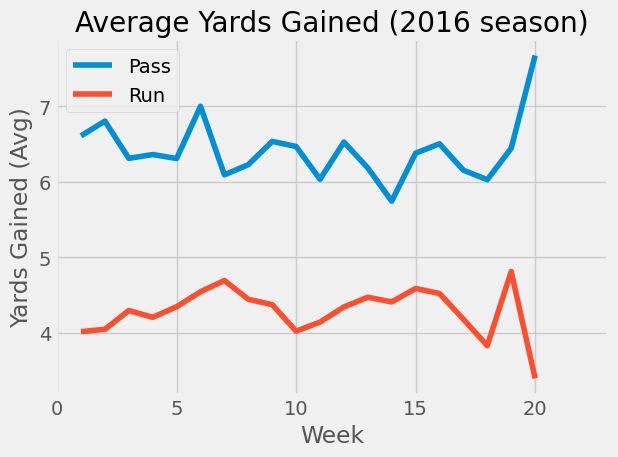

In [212]:
##Line Chart:
#print(plt.style.available)
plt.style.use('fivethirtyeight')


plt.title('Average Yards Gained (2016 season)')
plt.xlabel('Week')
plt.ylabel('Yards Gained (Avg)')

plt\
  .plot(df_pass_fig['week'], df_pass_fig['yards_gained'], label='Pass')

plt\
  .plot(df_run_fig['week'], df_run_fig['yards_gained'], label='Run')

plt.tight_layout()
plt.legend()